In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [3]:
cn=pd.read_csv(r"..\Data Sets\cleaned_novel_dataset.csv")
cn

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
0,Clifford's War: The Bluegrass Battleground,-,J. Denison Reed,Action-Adventure,4.42,33,16,4,2021-05-27,2021
1,Jurassic Park,Jurassic Park,Michael Crichton,Action-Adventure,4.09,944442,19172,307,1990-07-11,1990
2,Sunburst,Sky King Ranch,Susan May Warren,Action-Adventure,4.43,1467,335,2,2022-01-06,2022
3,The Paris Apartment,-,Lucy Foley,Action-Adventure,3.67,473386,40240,3,2022-02-22,2022
4,Dempsey,Tier One,Brian Andrews,Action-Adventure,4.58,1708,86,13,2023-02-21,2023
...,...,...,...,...,...,...,...,...,...,...
6983,They Thirst,-,Robert McCammon,Horror/Paranormal,3.91,12688,564,46,1981-01-01,1981
6984,Snap,-,Steven Bredice,Horror/Paranormal,3.40,43,11,2,2012-01-01,2012
6985,The Traveling Vampire Show,-,Richard Laymon,Horror/Paranormal,3.83,8813,645,40,2000-01-04,2000
6986,WISHBONE...Be Careful What You Wish For,-,Brooklyn Hudson,Horror/Paranormal,3.73,764,94,2,2012-02-20,2012


In [4]:
#Dataset without duplicate values with respect to Novel_Name, Series_Name, Author_Name
without_duplicates=cn.drop_duplicates(subset=['Novel_Name', 'Series_Name', 'Author_Name'],keep="first")
without_duplicates

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
0,Clifford's War: The Bluegrass Battleground,-,J. Denison Reed,Action-Adventure,4.42,33,16,4,2021-05-27,2021
1,Jurassic Park,Jurassic Park,Michael Crichton,Action-Adventure,4.09,944442,19172,307,1990-07-11,1990
2,Sunburst,Sky King Ranch,Susan May Warren,Action-Adventure,4.43,1467,335,2,2022-01-06,2022
3,The Paris Apartment,-,Lucy Foley,Action-Adventure,3.67,473386,40240,3,2022-02-22,2022
4,Dempsey,Tier One,Brian Andrews,Action-Adventure,4.58,1708,86,13,2023-02-21,2023
...,...,...,...,...,...,...,...,...,...,...
6983,They Thirst,-,Robert McCammon,Horror/Paranormal,3.91,12688,564,46,1981-01-01,1981
6984,Snap,-,Steven Bredice,Horror/Paranormal,3.40,43,11,2,2012-01-01,2012
6985,The Traveling Vampire Show,-,Richard Laymon,Horror/Paranormal,3.83,8813,645,40,2000-01-04,2000
6986,WISHBONE...Be Careful What You Wish For,-,Brooklyn Hudson,Horror/Paranormal,3.73,764,94,2,2012-02-20,2012


### Bivariate Analysis

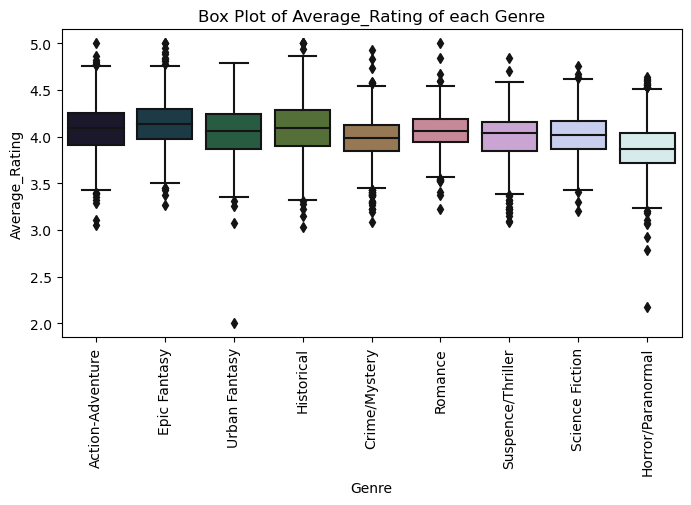

In [5]:
# Plotting the Box Plot of Average_Rating of each Genre
plt.figure(figsize=(8,4))
sns.boxplot(x='Genre', y='Average_Rating', data=cn, palette="cubehelix")
plt.xticks(rotation=90)
plt.title("Box Plot of Average_Rating of each Genre")
plt.show()

From the above box plot, it can be observed that the Urban Fantasy and Horror/Paranormal have the farthest outliers, ie 2 books from those two genres have average rating close to 2.

In [6]:
cn.sort_values(by="Average_Rating").head(2)

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
1601,Revealing Eden,Save the Pearls,Victoria Foyt,Urban Fantasy,2.00,977,374,5,2011-01-10,2011
6223,Imaginary Friends,-,Yolanda Jackson,Horror/Paranormal,2.17,6,1,2,2009-06-03,2009


In [8]:
pd.DataFrame(copy.groupby(by="Genre")["Average_Rating"].mean())

,Average_Rating
Genre,
Action-Adventure,4.084603
Crime/Mystery,3.981162
Epic Fantasy,4.146963
Historical,4.096231
Horror/Paranormal,3.876839
Romance,4.062415
Science Fiction,4.022136
Suspence/Thriller,4.002684
Urban Fantasy,4.050964


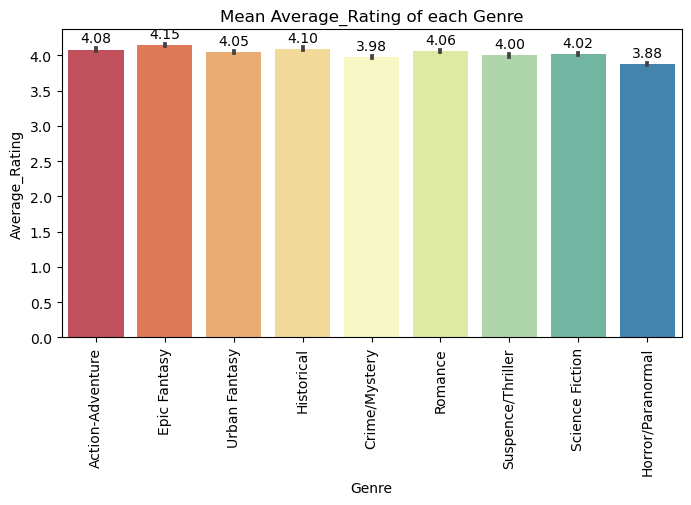

In [9]:
#Plotting the Mean Average_Rating of each Genre
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Genre', y='Average_Rating', data=cn, palette="Spectral", estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Mean Average_Rating of each Genre")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',(p.get_x()+p.get_width()/2,p.get_height()+ 0.1),ha="center")
plt.show()

From the above bar plot, it can be observed that the best genre according to the average rating is Epic Fantasy. And the least liked is Horror/Paranormal.

In [10]:
pd.DataFrame(cn.groupby(by="Genre")["Average_Rating"].max())

,Average_Rating
Genre,
Action-Adventure,5.00
Crime/Mystery,4.93
Epic Fantasy,5.00
Historical,5.00
Horror/Paranormal,4.64
Romance,5.00
Science Fiction,4.76
Suspence/Thriller,4.84
Urban Fantasy,4.79


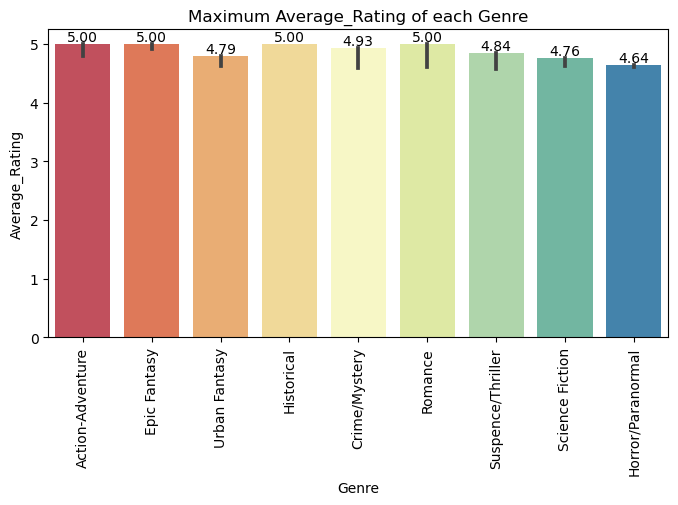

In [16]:
#Plotting the Maximum Average_Rating of each Genre
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Genre', y='Average_Rating', data=copy, palette="Spectral", estimator=np.max)
plt.xticks(rotation=90)
plt.title("Maximum Average_Rating of each Genre")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',(p.get_x()+p.get_width()/2,p.get_height()+0.05),ha="center")
plt.show()

In [12]:
pd.DataFrame(cn.groupby(by="Genre")["Average_Rating"].min())

,Average_Rating
Genre,
Action-Adventure,3.05
Crime/Mystery,3.09
Epic Fantasy,3.27
Historical,3.03
Horror/Paranormal,2.17
Romance,3.23
Science Fiction,3.20
Suspence/Thriller,3.09
Urban Fantasy,2.00


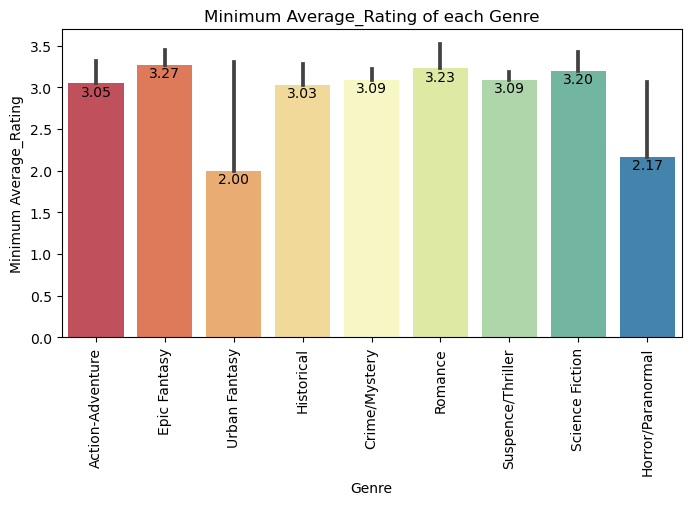

In [17]:
#Plotting the Minimum Average_Rating of each Genre
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Genre', y='Average_Rating', data=cn, palette="Spectral", estimator=np.min)
plt.xlabel("Genre")
plt.ylabel("Minimum Average_Rating")
plt.xticks(rotation=90)
plt.title("Minimum Average_Rating of each Genre")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',(p.get_x()+p.get_width()/2,p.get_height()- 0.15),ha="center")
plt.show()

In [18]:
a=without_duplicates.sort_values(by="Average_Rating",ascending=False).head(15)
a

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
349,Finding Fabi,-,Geoffrey Robert,Action-Adventure,5.00,3,1,2,2023-05-19,2023
2766,The Tears of the Desert: Love and Crime at the...,-,Conrad Fraider,Historical,5.00,2,0,1,2018-05-03,2018
2392,Born a Viking: Blót,-,Riccardo Polacci,Historical,5.00,4,1,1,2023-09-22,2023
2938,Jeska,Stories from the Plantation Book WA,Lady Dre,Historical,5.00,3,1,1,2020-05-30,2020
1086,Masks of Moi'dan,-,James Dwyer,Epic Fantasy,5.00,14,2,5,2016-07-14,2016
4451,Adventures in Trichology,-,Nicholas A. Price,Romance,5.00,14,6,7,2017-06-05,2017
1044,Scourge: Triskellion Book One,Triskellion Saga,Rodney McWilliams,Epic Fantasy,5.00,10,7,4,2022-09-01,2022
3056,Birdsong on Holbeck Moor,-,Billy Morris,Historical,5.00,7,3,1,2022-08-10,2022
1523,Hunted by Fire,-,Jim Hepburn,Epic Fantasy,4.95,21,10,19,2022-01-10,2022
2984,Hot Winter Sun,-,Jessica Russell,Historical,4.94,34,26,1,2020-06-28,2020


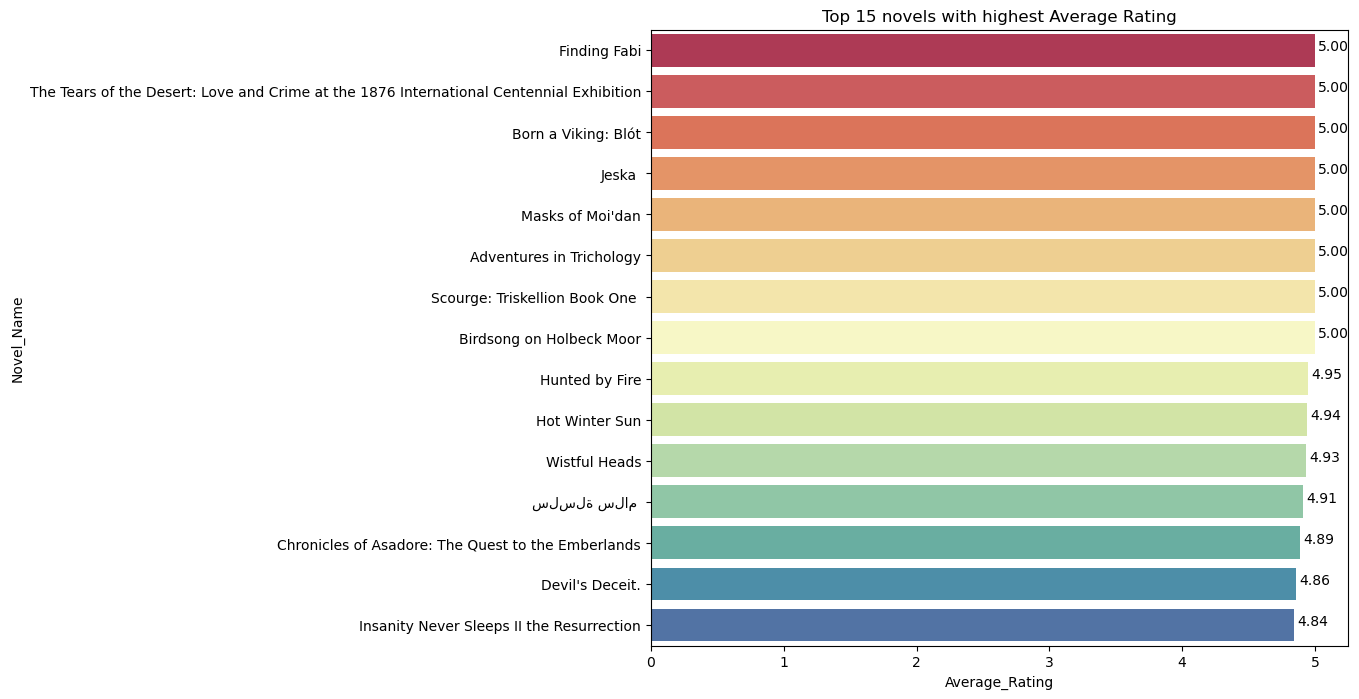

In [19]:
plt.figure(figsize=(9,8))
ax=sns.barplot(x="Average_Rating",y='Novel_Name',data=a, palette="Spectral")
plt.title("Top 15 novels with highest Average Rating")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

From the above bar plot, it can be observed that the following novels have the highest average rating in the dataset.

In [26]:
a=without_duplicates.groupby(by="Author_Name")["Average_Rating"].mean().reset_index().sort_values(by="Average_Rating",ascending=False).head(15)
a

,Author_Name,Average_Rating
1434,Lady Dre,5.00
2088,Rodney McWilliams,5.00
1807,Nicholas A. Price,5.00
797,Geoffrey Robert,5.00
460,Conrad Fraider,5.00
255,Billy Morris,5.00
2002,Riccardo Polacci,5.00
1133,Jim Hepburn,4.95
1125,Jessica Russell,4.94
812,Giovanni V. Crisan,4.93


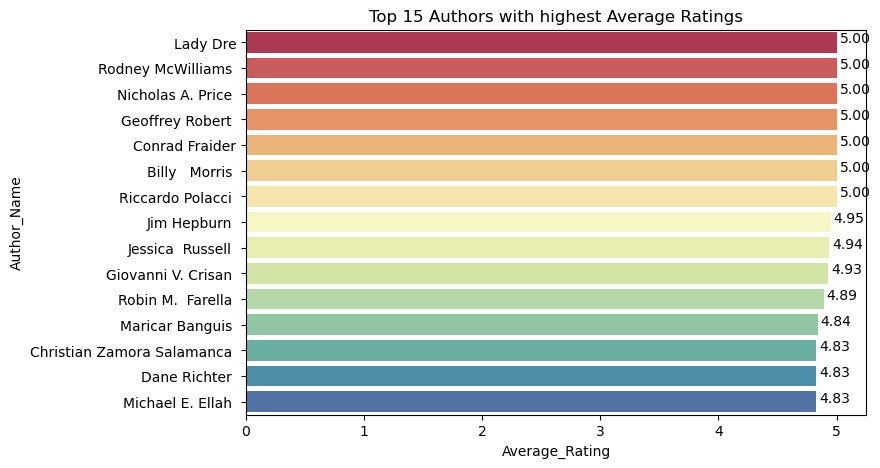

In [27]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x="Average_Rating",y='Author_Name',data=a, palette="Spectral",orient="h")
plt.title("Top 15 Authors with highest Average Ratings")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

From the above bar plot, it can be observed that the following authors have the highest mean average rating in the dataset.

In [30]:
authors_count=cn.groupby("Author_Name")["Author_Name"].count()    
author_10=pd.DataFrame()
for author, count in authors_count.items():
    if count>10:
        author_10=pd.concat([author_10,cn[cn['Author_Name'] == author]])       

In [31]:
author_10_=author_10.groupby("Author_Name")["Average_Rating"].mean().reset_index().sort_values("Average_Rating",ascending=False)

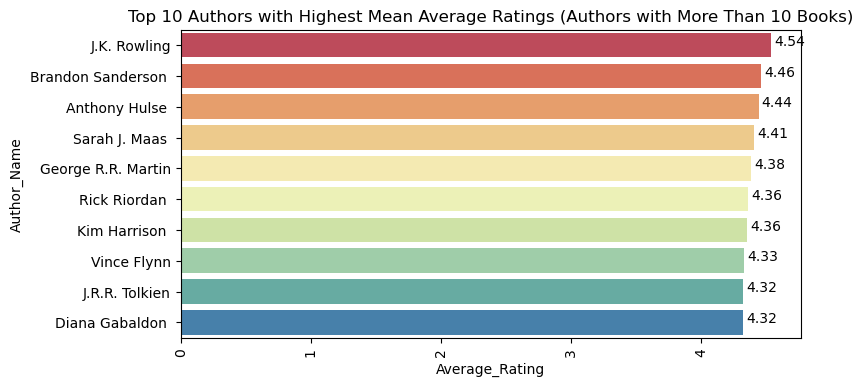

In [33]:
plt.figure(figsize=(8,4))
ax=sns.barplot(data=author_10_.head(10),x="Average_Rating",y="Author_Name",palette="Spectral")
plt.title("Top 10 Authors with Highest Mean Average Ratings (Authors with More Than 10 Books)")
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

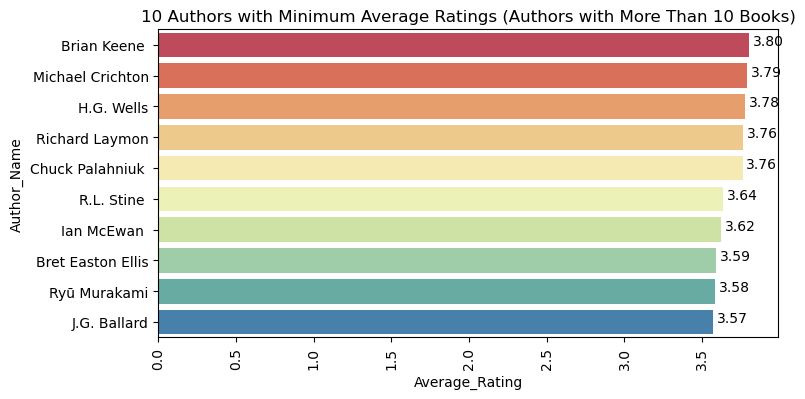

In [34]:
plt.figure(figsize=(8,4))
ax=sns.barplot(data=author_10_.tail(10),x="Average_Rating",y="Author_Name",palette="Spectral")
plt.title("10 Authors with Minimum Average Ratings (Authors with More Than 10 Books)")
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

In [35]:
for_series=(without_duplicates[~(without_duplicates["Series_Name"]=="-")])

In [36]:
series=for_series.groupby("Series_Name")["Average_Rating"].mean().reset_index().sort_values("Average_Rating",ascending=False).reset_index()
series

,index,Series_Name,Average_Rating
0,1373,Stories from the Plantation Book WA,5.00
1,1818,Triskellion Saga,5.00
2,6,3) - رواية سيد,4.91
3,1154,"Pre-Aztec Series,",4.84
4,1533,The Eldon Archives,4.83
...,...,...,...
1951,718,Imogene and the Boys,3.30
1952,1360,Star Wars: Aftermath,3.30
1953,267,Chronicles of the Shadow War,3.27
1954,1747,The Undergrad Years,3.23


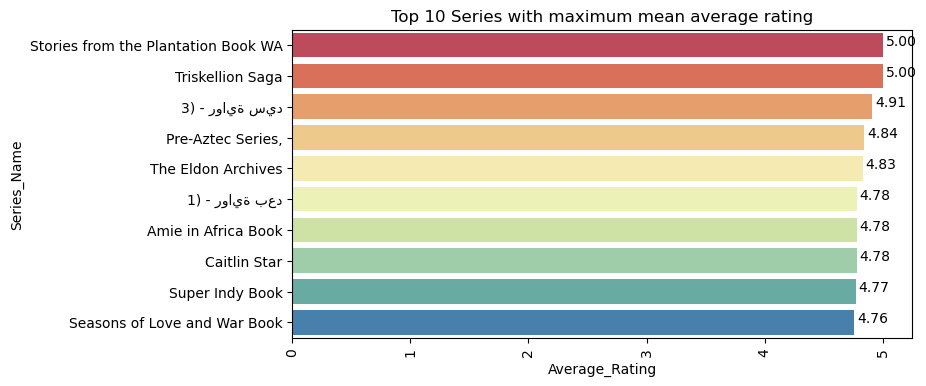

In [37]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Average_Rating',y='Series_Name',data=series.head(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 10 Series with maximum mean average rating")
for p in ax.patches:
     ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

In [38]:
series_count=for_series.groupby("Series_Name")["Series_Name"].count()    
series_5=pd.DataFrame()
for series,count in series_count.items():
    if count>=5:
        series_5=pd.concat([series_5,without_duplicates[without_duplicates['Series_Name'] == series]])  

In [39]:
series_5_=series_5.groupby("Series_Name")["Average_Rating"].mean().reset_index().sort_values("Average_Rating",ascending=False).reset_index()
series_5_

,index,Series_Name,Average_Rating
0,93,The Stormlight Archive,4.658000
1,31,Harry Potter,4.526250
2,96,Throne of Glass,4.448571
3,55,Mistborn,4.438000
4,83,The Fitzgeralds of Dublin,4.437500
...,...,...,...
103,107,"Wynette, Texas",3.914286
104,104,Weather Warden,3.880000
105,9,Blue Bloods,3.878000
106,25,Fallen,3.834000


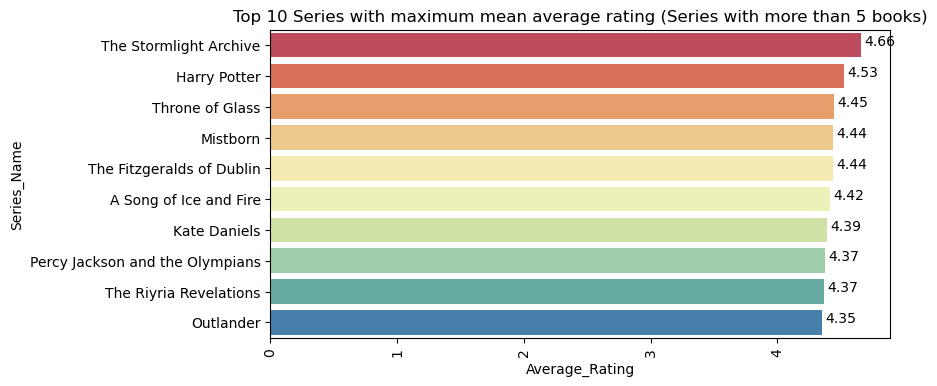

In [41]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Average_Rating',y='Series_Name',data=series_5_.head(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 10 Series with maximum mean average rating (Series with more than 5 books)")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

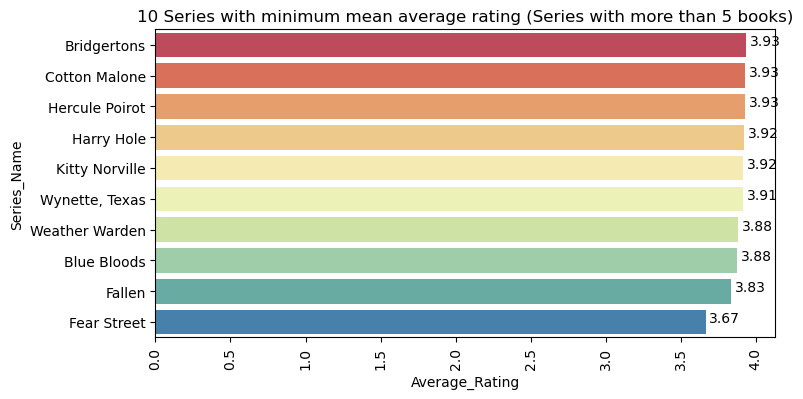

In [42]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Average_Rating',y='Series_Name',data=series_5_.tail(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("10 Series with minimum mean average rating (Series with more than 5 books)")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()